<a href="https://colab.research.google.com/github/mauroemartinez/RPA-exchange-rate-scrapping-automatic-mailing/blob/main/RPA_Tipos_de_Cambio_Mailing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🤖 RPA - 💵 Tipos de Cambio con 📧 Mailing Automático

#📚 Importar librerías y conexión a Google Drive 

In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

import time
import datetime
import pandas as pd
import numpy as np
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.0 MB 5.1 MB/s 
     |████████████████████████████████| 140 kB 46.1 MB/s 
     |████████████████████████████████| 384 kB 24.7 MB/s 
     |████████████████████████████████| 58 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ig

In [2]:
def redon(a):
    resultado = "{:,.2f}".format(round(a,2))
    return resultado

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#📝 Importación Excel desde Drive, para que sea acumulativo 

In [64]:
df = pd.read_excel(r'/content/gdrive/MyDrive/RPA/Seguimiento Dólar Blue.xlsx', index_col=None)
#df = pd.read_pickle("Seguimiento Dólar Blue.pkl")
df

,Fecha,Solidario,TCC_Blue,TCV_Blue,TCV_MEP,TCC_Billete,TCV_Billete,TCV_Divisas,Solidario / TCV Blue,MEP / TCV Billete,TCV Blue / TCC Blue %,Variación TCV Blue,TCV_MEP / TCV Billete
0,11/25/22,283.39,316.0,320.0,316.07,163.75,171.75,165.59,0.129186,NaN,0.012658,0.003135,0.840291
1,11/24/22,283.39,315.0,319.0,316.25,163.75,171.75,165.21,0.125657,0.841339,0.012698,0.022436,0.841339
2,11/23/22,282.56,308.0,312.0,315.08,163.25,171.25,164.84,0.104190,0.839883,0.012987,0.012987,0.839883
3,11/22/22,280.91,304.0,308.0,313.41,162.25,170.25,164.51,0.096437,0.840881,0.013158,0.006536,0.840881
4,11/18/22,277.61,302.0,306.0,318.49,161.25,169.25,163.18,0.102266,0.881773,0.013245,-0.003257,0.881773
5,11/17/22,279.26,303.0,307.0,310.17,161.25,169.25,162.78,0.099334,0.832614,0.013201,-0.003247,0.832614
6,11/16/22,278.85,304.0,308.0,308.98,161.00,169.00,162.47,0.104536,0.828284,0.013158,0.019868,0.828284
7,11/15/22,278.02,298.0,302.0,302.06,160.50,168.50,162.12,0.086253,0.792641,0.013423,0.027211,0.792641
8,11/14/22,276.38,290.0,294.0,298.97,159.50,167.50,161.78,0.063753,0.784896,0.013793,0.003413,0.784896
9,11/11/22,275.55,289.0,293.0,299.13,159.00,167.00,160.70,0.063328,0.791198,0.013841,0.003425,0.791198


#🤖 Ingreso a la web y toma de datos 

In [57]:
#ingreso a la web dolarhoy
driver = webdriver.Chrome('chromedriver',
                          chrome_options=chrome_options)

driver.get("https://dolarhoy.com/")

#toma de datos mediante xpath
solidario = driver.find_element("xpath",
                                '//*[@id="home_0"]/div[2]/section/div/div/div/div[1]/div/div[2]/div[6]/div/div[2]/div[2]')
blue_tcc = driver.find_element("xpath",
                               '//*[@id="home_0"]/div[2]/section/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/div[2]')
blue_tcv = driver.find_element("xpath",
                               '//*[@id="home_0"]/div[2]/section/div/div/div/div[1]/div/div[1]/div/div[1]/div[2]/div[2]')

#creación de fila nueva, la columna fecha toma la fecha de hoy y la convierte en serie de tiempo
dolar_hoy = pd.DataFrame({"Fecha":datetime.datetime.today(),
                          "Solidario":solidario.text,
                          "TCC_Blue":blue_tcc.text,
                          "TCV_Blue":blue_tcv.text},
                         index=[0])

dolar_hoy["Fecha"] = pd.to_datetime(dolar_hoy["Fecha"]).dt.strftime("%D")

#Eliminación de $
dolar_hoy.Solidario = dolar_hoy.Solidario.map(lambda x: x.lstrip('$'))
dolar_hoy.TCC_Blue = dolar_hoy.TCC_Blue.map(lambda x: x.lstrip('$'))
dolar_hoy.TCV_Blue = dolar_hoy.TCV_Blue.map(lambda x: x.lstrip('$'))

display(dolar_hoy)

driver.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until


,Fecha,Solidario,TCC_Blue,TCV_Blue
0,11/27/22,283.39,316,320


In [58]:
#ingreso a la web Banco Nación
driver = webdriver.Chrome('chromedriver',
                          chrome_options=chrome_options)

driver.get("https://www.bna.com.ar/Personas")
billete_tcc = driver.find_element("xpath",
                                  '//*[@id="billetes"]/table/tbody/tr[1]/td[2]')
billete_tcv = driver.find_element("xpath",
                                  '//*[@id="billetes"]/table/tbody/tr[1]/td[3]')

bna = pd.DataFrame({"TCC_Billete":billete_tcc.text,
                    "TCV_Billete":billete_tcv.text},
                   index=[0])

time.sleep(2)

driver.find_element("xpath",
                    '/html/body/main/div/div/div[4]/div[1]/div/ul').click()

time.sleep(2)

bna_tcv_divisas = driver.find_element("xpath",
                                      '//*[@id="divisas"]/table/tbody/tr[1]/td[3]')
bna_tcv_divisas = pd.DataFrame({"TCV_Divisas":bna_tcv_divisas.text},
                               index=[0])

bna = pd.concat([bna,bna_tcv_divisas],
                axis = 1)

bna = bna.apply(lambda x: x.str.replace(',',
                                        '.'))

bna = bna.apply(pd.to_numeric)

display(bna)

driver.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until


,TCC_Billete,TCV_Billete,TCV_Divisas
0,163.75,171.75,165.59


In [59]:
driver = webdriver.Chrome('chromedriver',
                          chrome_options=chrome_options)
driver.get("https://www.ambito.com/contenidos/dolar-mep.html")

mep = driver.find_element("xpath",
                          '//*[@id="note-detail"]/main/div[4]/div[1]/div/div[3]/span[2]')

ambito = pd.DataFrame({"TCV_MEP":mep.text},
                      index=[0])

ambito = ambito.apply(lambda x: x.str.replace(',',
                                              '.'))

ambito = ambito.apply(pd.to_numeric)

display(ambito)

driver.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


,TCV_MEP
0,316.07


In [60]:
#nueva fila final con los datos de las 3 webs
row = pd.concat([dolar_hoy,ambito,bna],
                axis = 1)
row

,Fecha,Solidario,TCC_Blue,TCV_Blue,TCV_MEP,TCC_Billete,TCV_Billete,TCV_Divisas
0,11/27/22,283.39,316,320,316.07,163.75,171.75,165.59


#🖥️ Concatenado de la nueva fila en el DataFrame acumulado 

In [53]:
#concatenado de la fila nueva
df = pd.concat([row,df.loc[:]]).reset_index(drop=True)

#pasar todo a número, ya que el tipo de dato al haber tenido un signo $ no es un número
df[
    [
      "TCC_Blue",
      "TCV_Blue",
      "Solidario",
      "TCV_MEP",
      "TCC_Billete",
      "TCV_Billete",
      "TCV_Divisas"
    ]
] = df[
       [
        "TCC_Blue",
        "TCV_Blue",
        "Solidario",
        "TCV_MEP",
        "TCC_Billete",
        "TCV_Billete",
        "TCV_Divisas"
        ]
].apply(
        pd.to_numeric
)

#crear columnas de cálculo de brechas y variación del día
df["TCV_MEP / TCV Billete"] = df.TCV_MEP/df.TCV_Billete-1
df["Solidario / TCV Blue"] = df["TCV_Blue"]/df["Solidario"]-1
df["TCV Blue / TCC Blue %"] = df["TCV_Blue"]/df["TCC_Blue"]-1
df["Variación TCV Blue"] = [0]*len(df)
for i in range(len(df)-1):
    df["Variación TCV Blue"].loc[i] = (df["TCV_Blue"].loc[i]/df["TCV_Blue"].loc[i+1]-1)

#eliminación de duplicados, por si se usa dos veces el mismo día no duplique datos
df = df.drop_duplicates(subset=None,
                        keep='first',
                        inplace=False,
                        ignore_index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#📊 Reporte diario 

In [65]:
#eliminar NaNs para que sea más entendible para los usuarios finales
df = df.replace(np.nan,"")

#formateo el despliegue para que me traiga % y 2 decimales, de manera que quede un output cool
planilla = df.head(11).style.format(
    {"Solidario": "{:.2f}",
     "TCV_MEP": "{:2}",
     "TCC_Blue": "{:0}",
     "TCV_Blue": "{:0}",
     "TCC_Billete": "{:2}",
     "TCV_Billete": "{:2}",
     "TCV_Divisas": "{:3}",
     "TCV_MEP / TCV Billete": "{:.2}",
     "Solidario / TCV Blue": "{:.2%}",
     "TCV Blue / TCC Blue %": "{:.2%}",
     "Variación TCV Blue": "{:.2%}"
     }
)

display(planilla)

# Resumen del día de la fecha

print(f"""
{"-" * 142}

🤖 Resumen diario 💵:

Costo comprar USD 200 blue: $ {redon(float(df["TCV_Blue"].iloc[0] * 200))}
Costo comprar USD 200 oficiales con impuestos: $ {redon(float(df["Solidario"].iloc[0] * 200))}
La diferencia es de: $ {redon(float(df["TCV_Blue"].iloc[0] * 200 - df["Solidario"].iloc[0] * 200))}
La brecha entre solidario y blue {float((1 - df["Solidario"].iloc[0] / df["TCV_Blue"].iloc[0]) * 100):.2f}%
El dólar solidario varió: {float(((df["Solidario"].iloc[0] / df["Solidario"].iloc[1] - 1) * 100)):.2f}%
El dólar blue varió: {float(((df["TCV_Blue"].iloc[0] / df["TCV_Blue"].iloc[1] - 1) * 100)):.2f}%
El dólar divisas varió un: {float(((df["TCV_Divisas"].iloc[0] / df["TCV_Divisas"].iloc[1] - 1) * 100)):.2f}%"""
)

,Fecha,Solidario,TCC_Blue,TCV_Blue,TCV_MEP,TCC_Billete,TCV_Billete,TCV_Divisas,Solidario / TCV Blue,MEP / TCV Billete,TCV Blue / TCC Blue %,Variación TCV Blue,TCV_MEP / TCV Billete
0,11/25/22,283.39,316.0,320.0,316.07,163.75,171.75,165.59,12.92%,,1.27%,0.31%,0.84
1,11/24/22,283.39,315.0,319.0,316.25,163.75,171.75,165.21,12.57%,0.841339,1.27%,2.24%,0.84
2,11/23/22,282.56,308.0,312.0,315.08,163.25,171.25,164.84,10.42%,0.839883,1.30%,1.30%,0.84
3,11/22/22,280.91,304.0,308.0,313.41,162.25,170.25,164.51,9.64%,0.840881,1.32%,0.65%,0.84
4,11/18/22,277.61,302.0,306.0,318.49,161.25,169.25,163.18,10.23%,0.881773,1.32%,-0.33%,0.88
5,11/17/22,279.26,303.0,307.0,310.17,161.25,169.25,162.78,9.93%,0.832614,1.32%,-0.32%,0.83
6,11/16/22,278.85,304.0,308.0,308.98,161.0,169.0,162.47,10.45%,0.828284,1.32%,1.99%,0.83
7,11/15/22,278.02,298.0,302.0,302.06,160.5,168.5,162.12,8.63%,0.792641,1.34%,2.72%,0.79
8,11/14/22,276.38,290.0,294.0,298.97,159.5,167.5,161.78,6.38%,0.784896,1.38%,0.34%,0.78
9,11/11/22,275.55,289.0,293.0,299.13,159.0,167.0,160.7,6.33%,0.791198,1.38%,0.34%,0.79



----------------------------------------------------------------------------------------------------------------------------------------------

🤖 Resumen diario 💵:

Costo comprar USD 200 blue: $ 64,000.00
Costo comprar USD 200 oficiales con impuestos: $ 56,678.00
La diferencia es de: $ 7,322.00
La brecha entre solidario y blue 11.44%
El dólar solidario varió: 0.00%
El dólar blue varió: 0.31%
El dólar divisas varió un: 0.23%


#💾 Exportar a Excel y guardar en Drive 

In [66]:
df.to_excel(r'/content/gdrive/MyDrive/RPA/Seguimiento Dólar Blue.xlsx', index=False)
#df.to_pickle("Seguimiento Dólar Blue.pkl")

#📮Mailing automático

In [144]:
#Dar vuelta el dataframe y poner Fecha como índice, para que hacer gráficso correctos
data = df
#formateo la fecha según quiero qeu salga en el eje x
data.index = pd.to_datetime(data["Fecha"]).dt.strftime("%d/%m/%y")
#las últimas 7 filas tienen nans, así que prefiero que no se tomen
data = data.iloc[:-7,1:8]
#Damos vuelta los datos
data = data.iloc[::-1]
data = data.dropna(how="any",
                   axis=0)
data

,Solidario,TCC_Blue,TCV_Blue,TCV_MEP,TCC_Billete,TCV_Billete,TCV_Divisas
Fecha,,,,,,,
21/10/22,263.18,287.0,291.0,291.95,151.5,159.5,153.79
24/10/22,265.65,287.0,291.0,291.2,153.0,161.0,154.74
25/10/22,266.47,289.0,293.0,292.13,153.5,161.5,155.08
26/10/22,266.47,288.0,292.0,292.55,153.5,161.5,155.39
27/10/22,266.47,286.0,290.0,297.39,153.5,161.5,155.69
28/10/22,266.47,288.0,292.0,295.18,153.5,161.5,156.02
31/10/22,268.13,287.0,291.0,294.68,154.5,162.5,156.91
01/11/22,268.95,286.0,290.0,290.41,155.0,163.0,157.28
02/11/22,269.77,287.0,291.0,290.79,155.5,163.5,157.6


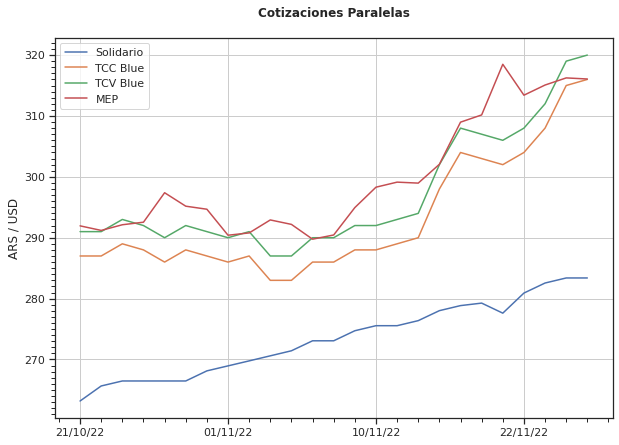

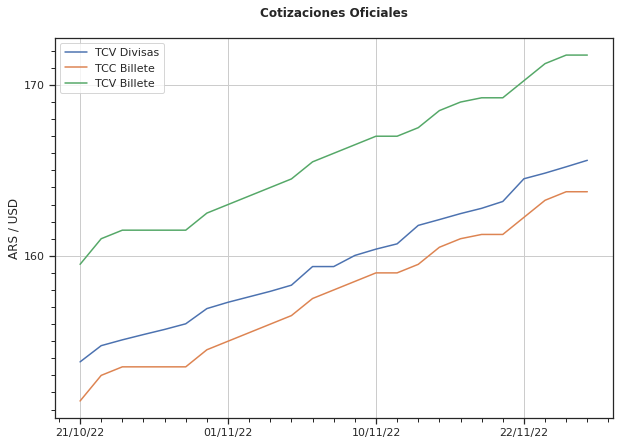

In [154]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#Gráfico 1 con los tipso de cambio paralelos
fig, graf1 = plt.subplots(figsize=(10,
                                   7),
                           sharex=True
                          )
#estilo de gráfico, con ticks en X e Y
sns.set(style="ticks")

#Creación dee líneas los 4 gráficos que se superpondrán
#No puedo usar hue ya ue cada columna me da un dato, y no tengo una columna categórica
ax = sns.lineplot(x='Fecha',
                  y="Solidario",
                  data=data,
                  label = 'Solidario'
                  )
ax2 = sns.lineplot(x='Fecha',
                   y="TCC_Blue",
                   data=data,
                   label = 'TCC Blue'
                   )
ax3 = sns.lineplot(x='Fecha',
                   y="TCV_Blue",
                   data=data,
                   label = 'TCV Blue'
                   )
ax4 = sns.lineplot(x='Fecha',
                   y="TCV_MEP",
                   data=data,
                   label = 'MEP'
                   )

graf1.set_title("Cotizaciones Paralelas\n",
                fontweight="bold"
                )

#Personalización del eje X
graf1.xaxis.set_major_locator(MultipleLocator(7))
graf1.xaxis.set_minor_locator(MultipleLocator(1))
graf1.set(xlabel=None)

#Título del eje Y
graf1.set(ylabel="ARS / USD")
graf1.yaxis.set_major_locator(MultipleLocator(10))
graf1.yaxis.set_minor_locator(MultipleLocator(1))

#Agregamos el grid del fondo
plt.grid() 

#Guardamos la imagen como .jpg para enviarla por mail
plt.savefig('graf1.jpg')

#Hacemos lo mismo con el gráifo 2, con tipos de cambios oficiales
fig, graf2 = plt.subplots(figsize=(10, 7))

ax1 = sns.lineplot(x='Fecha',
                   y="TCV_Divisas",
                   data=data,
                   label = 'TCV Divisas'
                   )
ax2 = sns.lineplot(x='Fecha',
                   y="TCC_Billete",
                   data=data,
                   label = 'TCC Billete'
                   )
ax3 = sns.lineplot(x='Fecha',
                   y="TCV_Billete",
                   data=data,
                   label = 'TCV Billete'
                   )

graf2.set_title("Cotizaciones Oficiales\n",
                fontweight="bold")

graf2.xaxis.set_major_locator(MultipleLocator(7))
graf2.xaxis.set_minor_locator(MultipleLocator(1))
graf2.set(xlabel=None)

graf2.set(ylabel="ARS / USD")
graf2.yaxis.set_major_locator(MultipleLocator(10))
graf2.yaxis.set_minor_locator(MultipleLocator(1))

plt.grid() 

plt.savefig('graf2.jpg')

#Despliego ambos gráficos para verlos
display(graf1,
        graf2)

In [149]:
import smtplib #todo lo relativo al mailing
import ssl #para darle seguridad
from email.message import EmailMessage #edición del cuerpo del mail
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from tabulate import tabulate #para personalizar la tabla

import mimetypes
from email.mime.image import MIMEImage
from email.mime.base import MIMEBase
from email import encoders

fecha = datetime.datetime.today()

#Declaración de variables
email_sender = "bibybsa@gmail.com"
email_password = "email_password"
email_receiver = ["martinezmauroezequiel@gmail.com",
                  "siquilacamila@gmail.com",
                  "maximo.garcia@grupohst.com",
                  "garciiamaximo@gmail.com",
                  "fretesricardo20@gmail.com",
                  "danielignacio605@gmail.com",
                  "riosnicolasbr@gmail.com",
                  "alannicolassauer@hotmail.com",
                  "djacue@gmail.com",
                  "rochita.sp@hotmail.com",
                  "renzo.deleo@gmail.com",
                  "m.cardozo@wega.com.ar",
                  "facundoezequiel_andrada@hotmail.com",
                  "lsantanasilva@bybsa.com.ar",
                  "bibybsa@gmail.com"]
email_receiver = email_sender

col_list = ["Fecha",
            "Solidario",
            "tccblue",
            "tcvblue",
            "mep",
            "tccBillete",
            "tcvBillete",
            "tcvDivisas"]
data_values = df.iloc[:11, :8].values.tolist()
table = tabulate(data_values,
                 headers=col_list,
                 tablefmt = "html",
                 numalign="center",
                 floatfmt=".2f"
                 )

html = f"""<!DOCTYPE html>
<html lang="es">
   <head>
      <meta charset="UTF-8">
      <meta http-equiv="X-UA-Compatible" content="IE=edge">
      <meta name="viewport" content="width=device-width, initial-scale=1.0">
   </head>
   <body>
      <p>
         Buenas tardes,<br><br>
         La siguiente tabla representa los últimos 10 días de las cotizaciones del dólar en Argentina:<br>
      </p>
      {table}<br>
      <p> 💵 <b>Resumen diario:</b> <br></p>
      <p>
         <b>Costo comprar USD 200 blue:</b> $ {redon(float(df["TCV_Blue"].iloc[0] * 200))} <br>
         <b>Costo comprar USD 200 oficiales con impuestos:</b> $ {redon(float(df["Solidario"].iloc[0] * 200))}<br>
         <b>La diferencia es de:</b> $ {redon(float(df["TCV_Blue"].iloc[0] * 200 - df["Solidario"].iloc[0] * 200))}<br><br>
         <b>La brecha entre solidario y bluees:</b> {float((1 - df["Solidario"].iloc[0] / df["TCV_Blue"].iloc[0]) * 100):.2f}%<br>
         <b>El dólar solidario varió:</b> {float(((df["Solidario"].iloc[0] / df["Solidario"].iloc[1] - 1) * 100)):.2f}%<br>
         <b>El dólar blue varió:</b> {float(((df["TCV_Blue"].iloc[0] / df["TCV_Blue"].iloc[1] - 1) * 100)):.2f}%<br>
         <b>El dólar divisas varió un:</b> {float(((df["TCV_Divisas"].iloc[0] / df["TCV_Divisas"].iloc[1] - 1) * 100)):.2f}%
      </p>
      <p> 📈 <b>Gráficos históricos:</b> <br></p>
      <img src='cid:image1'>
      <img src='cid:image2'>
      <p>
         Muchas gracias por leer,<br>
         Ojalá te sirva,<br><br>
      <p> 
         <i>🤖Este es un mail automático creado por Mauro E. Martinez, comunicarse mediante correo martinezmauroezequiel@gmail.com ante cualquier duda, inconveniencia, feedback o desuscripción.<br></i>
      </p>
      </p>  
   </body>
</html>
"""


em = MIMEMultipart('related')
body = MIMEText(html,
                'html')
em.attach(body)

em['From'] = email_sender
em["To"] = email_sender
em['Cco'] = ', '.join(email_receiver)
em["Subject"] = f"[🤖Mail Automático] Reporte de tipos de cambio - {fecha:%d-%m-%Y} 💵"

# This example assumes the image is in the current directory
fp = open('graf1.jpg',
          'rb')
msgImage = MIMEImage(fp.read())
fp.close()

# Define the image's ID as referenced above
msgImage.add_header('Content-ID',
                    '<image1>')
em.attach(msgImage)

# This example assumes the image is in the current directory
fp = open('graf2.jpg',
          'rb')
msgImage = MIMEImage(fp.read())
fp.close()

# Define the image's ID as referenced above
msgImage.add_header('Content-ID',
                    '<image2>')
em.attach(msgImage)

context = ssl.create_default_context()

with smtplib.SMTP_SSL("smtp.gmail.com",
                      465,
                      context=context) as smtp:
                      smtp.login(email_sender,
                                 email_password)
                      smtp.sendmail(email_sender,
                                    email_receiver,
                                    em.as_string())


#🖩 Calculadora de compra de dólares

In [ ]:
#permitir escribir el número a multiplicar por tipos de cambios
print("\nLos tipos de cambios a utilizar son:\n",
      "\nTCV Blue:",
      df.TCV_Blue.iloc[0],
      "\nTC Solidario:",
      df.Solidario.iloc[0],
      "\nTCV MEP",
      df.TCV_MEP.iloc[0])

usd = float(input("\nUSD a comprar: "))

#podemos modificar acá el cupo del dólar oficial
cupo_usd = 200

#primero prueba que el número sea positivo
try:
    usd = float(usd)
    if usd < 0:
        raise NonPositiveError
#si si es menor o igual al cupo, sin alertas
    elif usd <= cupo_usd:
        print(
            f"\nCosto de comprar USD {usd} blue: $",
            redon(float(df["TCV_Blue"].iloc[0] * usd)),
            f"\nCosto de comprar USD {usd} oficial: $",
            redon(float(df["Solidario"].iloc[0] * usd)),
            f"\nCosto de comprar USD {usd} MEP: $",
            redon(float(df["TCV_MEP"].iloc[0] * usd))
        )
#si es mayor al cupo, debe alertar al usuario
    else:
        print(
            f"\n¡Su compra supera el cupo de USD {cupo_usd} permitido actualmente!\n",
            f"\nCosto de comprar USD {usd} blue: $",
            redon(float(df["TCV_Blue"].iloc[0] * usd)),
            f"\nCosto de comprar USD {usd} oficial: $",
            redon(float(df["Solidario"].iloc[0] * usd)),
            f"\nCosto de comprar USD {usd} MEP: $",
            redon(float(df["TCV_MEP"].iloc[0] * usd))
        )
#cringebot que saluda al terminar xd
finally:
    print("\n¡Espero que te sea útil! 🤖")